# Analysis looking at GEV 

In [1]:
import numpy as np
import lmoments3
import lmoments
#import lmoments_rm as lr
import scipy
import matplotlib.pyplot as plt
import itertools
import xarray as xr
from numba import jit

# Scipy version

In [2]:
# import GEV class for demo
import matplotlib.pyplot as plt
from scipy.stats import genextreme as gev
import numpy as np

In [3]:
import sys

def is_interactive():
    import __main__ as main
    return not hasattr(main, '__file__')

from sys import argv

if is_interactive():
    params = [10]
else:
    print(argv)
    ss=argv[1:]
    print(ss)
    params = [float(i) for i in ss]
   
    
print(params)
print(is_interactive())



[10]
True


The shape parameter sets determine the family of curves and the scale parameter just capture the same relationship.  As shape parameter becomes more positive the tail of the distribution shrinks and the ARI collapses, which helps make the determination easier with less samples.

In [101]:
loc=10
file1='loc10.nc'
da=xr.open_dataset(file1)

In [102]:
da

<xarray.Dataset>
Dimensions:                        (shape: 11, scale: 10, size: 5, ari: 5)
Coordinates:
  * shape                          (shape) float64 -0.5 -0.4 -0.3 ... 0.4 0.5
  * scale                          (scale) float64 0.5 1.0 1.5 ... 4.0 4.5 5.0
  * size                           (size) int64 50 100 500 1000 5000
  * ari                            (ari) float64 10.0 20.0 50.0 100.0 200.0
Data variables:
    __xarray_dataarray_variable__  (scale, shape, size, ari) float64 ...

In [111]:
asol=da.__xarray_dataarray_variable__
n=asol.coords['size'].values
ashp=asol.coords['shape'].values*(-1)
ascl=asol.coords['scale'].values
ari=asol.coords['ari'].values


In [133]:
def cplot1(l):
    cc=asol[1,:,:,l]
    plt.contourf(n,ashp,cc,cmap='RdBu_r',levels=[.1,1,5,10,25,50,75,100,200],
             extend='max',)
    plt.xlabel('Sample Number')
    plt.ylabel('Shape Parameter')
    plt.xscale("log")
    plt.title('ARI = 1 in  {:.1f}'.format(ari[l])+' year' + 
              '  Scale={:.1f}'.format(ascl[1]))
    plt.colorbar(label='% Error',shrink=0.8)
    plt.contour(n,ashp,cc,levels=([10]),colors='white',linewidths=3)
    return

def cplot2(l):
    cc=asol[:,7,:,l]
    plt.contourf(n,ascl,cc,cmap='RdBu_r',levels=[.1,1,5,10,25,50,75,100,200],
             extend='max')
    plt.xlabel('Sample Number')
    plt.ylabel('Scale Parameter')
    plt.xscale("log")
    plt.title('ARI = 1 in  {:.1f}'.format(ari[l])+' year' +
             '  Scale={:.1f}'.format(ashp[7]))
    plt.colorbar()
    plt.contour(n,ascl,cc,levels=([10]),colors='white',linewidths=3)
    return

def cplot3(l,m):
    cc=asol[l,m,:,:]*1
    plt.contourf(ari,n,cc,cmap='RdBu_r',levels=[.1,1,5,10,25,50,75,100,200],
             extend='max')
    plt.xlabel('Return Period')
    plt.ylabel('Number of Samples')
    plt.yscale("log")
    plt.title('Loc='+str(loc)+' Scale= {:.1f}'.format(ascl[l])+
              ' Shape={:.2f}'.format(ashp[m]))
   # plt.xscale("log")
    plt.colorbar()
    plt.contour(ari,n,cc,levels=[10],colors='white',linewidths=3)

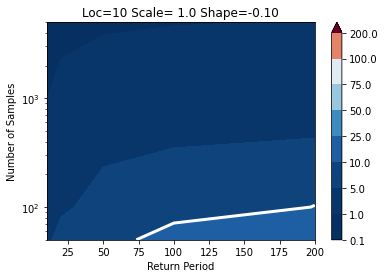

In [134]:
cplot3(1,6)

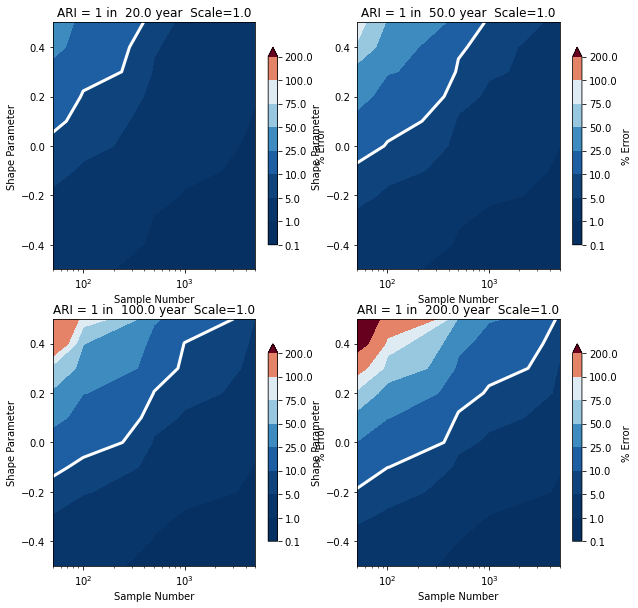

In [124]:
# for shape parameter
plt.figure(1, figsize=(10, 10))

plt.subplot(221); cplot1(1)
plt.subplot(222); cplot1(2)
plt.subplot(223); cplot1(3)
plt.subplot(224); cplot1(4)

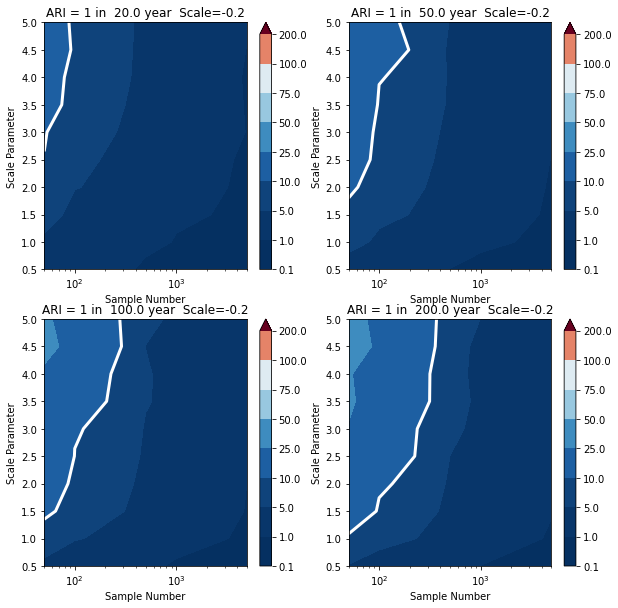

In [127]:
# for scale parameter
plt.figure(1, figsize=(10, 10))

plt.subplot(221); cplot2(1)
plt.subplot(222); cplot2(2)
plt.subplot(223); cplot2(3)
plt.subplot(224); cplot2(4)

In [116]:
ashp

array([ 0.5,  0.4,  0.3,  0.2,  0.1, -0. , -0.1, -0.2, -0.3, -0.4, -0.5])

In [110]:
# save output as a xarray dataset
#da = xr.DataArray(data=asol*100, dims=["scale","shape","size","ari"],
#                coords=dict(shape=ashp, scale =ascl, size=n, ari=aep),
 #                 attrs=dict(description="Return Period Uncertainty",units="percentage",),
 #                )


In the two figures above the white line denotes 10% error in ARI. For the 10% error, one needs 100s of samples and it approaches 1000s for a ARI of 1 in 100 year event.  